In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,Math

# Renumbering the nodes 1,2,3,4 as 4,1,2,3


In [3]:
def FrameElemStiffness(E,A,H,I):
    return np.array([[E*A/H,0,0,-E*A/H,0,0],[0,12*E*I/(H**3),6*E*I/(H**2),0,-12*E*I/(H**3),6*E*I/(H**2)],[0,6*E*I/(H**2),4*E*I/H,0,-6*E*I/(H**2),2*E*I/(H)],[-E*A/H,0,0,E*A/H,0,0],[0,-12*E*I/(H**3),-6*E*I/(H**2),0,12*E*I/(H**3),-6*E*I/(H**2)],[0,6*E*I/(H**2),2*E*I/(H),0,-6*E*I/(H**2),4*E*I/(H)]])

In [6]:
display(Math('All\space distances\space are\space in\space mm\space and\space loads\space in\space kN.'))
display(Math('Areas\space are\space in\space mm^{2}\space and\space so\space on.'))
B,H,P,M,E,A,I=input("Enter the values of B,H,P,M,E (in GPa),A and I  in the same order separated by commas\n").split(',')
B,H,P,M,E,A,I=float(B),float(H),float(P),float(M),float(E),float(A),float(I)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Enter the values of B,H,P,M,E (in GPa),A and I  in the same order separated by commas
4000,3000,20,12000,210,20000,50000000


# Element stiffness matrices

In [9]:
#Element 1                  (connecting nodes 4 and 1)

k1_l=FrameElemStiffness(E,A,H,I)             #l for local
c1,s1=0,1                                    #c,s for cos and sin; theta=90
T1=np.array([[c1,s1,0,0,0,0],[-s1,c1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,c1,s1,0],[0,0,0,-s1,c1,0],[0,0,0,0,0,1]])
k1=np.linalg.multi_dot([np.matrix.transpose(T1),k1_l,T1])
As_1=[10,11,12,1,2,3]

#Element 2                  (connecting nodes 1 and 2)

k2=FrameElemStiffness(E,A,B,I)
As_2=[1,2,3,4,5,6]

#Element 3                   (connecting nodes 2 and 3)
 
k3_l=FrameElemStiffness(E,A,H,I)
c3,s3=c1,s1
T3=np.array([[c1,s1,0,0,0,0],[-s1,c1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,c1,s1,0],[0,0,0,-s1,c1,0],[0,0,0,0,0,1]])
k3=np.linalg.multi_dot([np.matrix.transpose(T3),k3_l,T3])
As_3=[7,8,9,4,5,6]

# Total structure stiffness matrix

In [11]:
As_com=[As_1,As_2,As_3]
k_com=[k1,k2,k3]

Kts=np.zeros([12,12])
for i in range(3):       # for 3 elements
    for j in range(6):   # both 6s for member dofs          
        for k in range(6):
            Kts[As_com[i][j]-1][As_com[i][k]-1]+=k_com[i][j][k]

#Correction for renumbering
r=[4,5,6,7,8,9,10,11,12,1,2,3]

Kts_actual=np.zeros([12,12])

for i in range(12):
    for j in range(12):
        Kts_actual[r[i]-1][r[j]-1]+=Kts[i][j]
display(Math('K_{TS}\space(in\space kN/mm)=%s'%(sym.latex(sym.sympify(Kts_actual)))))

<IPython.core.display.Math object>

# Displacements and rotations

In [13]:
Kpp=Kts[0:6,0:6]
Kxp=Kts[6:12,0:6]
F=np.transpose(np.array([[-P,0,0,0,0,M]]))

Ikpp=np.linalg.inv(Kpp)                     

Dp=np.dot(Ikpp,F)
display(Math('Displacements\space (in\space mm\space and\space rad)=%s'%sym.latex(sym.sympify(Dp))))

<IPython.core.display.Math object>

# Reactions

In [15]:
X=np.dot(Kxp,Dp)
display(Math('Reactions\space at\space nodes\space 4\space and\space 1 (in\space kN\space and\space kNmm)=%s'%sym.latex(sym.sympify(X))))

<IPython.core.display.Math object>

# Element forces

In [23]:
D1=np.zeros([6,1])
for i in range(6):
    if As_1[i]<=6:
        D1[i]+=Dp[As_1[i]-1]

D1_l=np.matmul(T1,D1)                                   # l for local

#local force vector
f_1=np.matmul(k1_l,D1_l)

D2=np.zeros([6,1])
for i in range(6):
    if As_2[i]<=6:
        D2[i]+=Dp[As_2[i]-1]

D1_2=D2                                   # l for local

#local force vector
f_2=np.matmul(k2,D1_2)

D3=np.zeros([6,1])
for i in range(6):
    if As_3[i]<=6:
        D3[i]+=Dp[As_3[i]-1]

D1_3=np.matmul(T3,D3)                                   # l for local

#local force vector
f_3=np.matmul(k3_l,D1_3)
display(Math('Axial\space force(kN),\space shear\space force(kN)\space and\space bending\space moment(kNmm)\space for\space element\space 1 =%s'%sym.latex(sym.sympify(f_1))))
display(Math('Axial\space force(kN),\space shear\space force(kN)\space and\space bending\space moment(kNmm)\space for\space element\space 2 =%s'%sym.latex(sym.sympify(f_2))))
display(Math('Axial\space force(kN),\space shear\space force(kN)\space and\space bending\space moment(kNmm)\space for\space element\space 3 =%s'%sym.latex(sym.sympify(f_3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# AFD

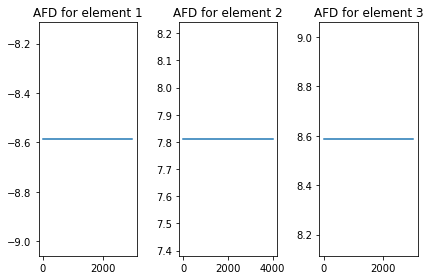

In [29]:
# Negative for compression and positive for tension

plt.subplot(1,3,1)
plt.plot([0,H],[-f_1[0],-f_1[0]])
plt.title('AFD for element 1')

plt.subplot(1,3,2)
plt.plot([0,B],[-f_2[0],-f_2[0]])
plt.title('AFD for element 2')

plt.subplot(1,3,3)
plt.plot([0,H],[-f_3[0],-f_3[0]])
plt.title('AFD for element 3')

plt.tight_layout()
plt.show()

# SFD (All SFDs are drawn on the outer side of element)

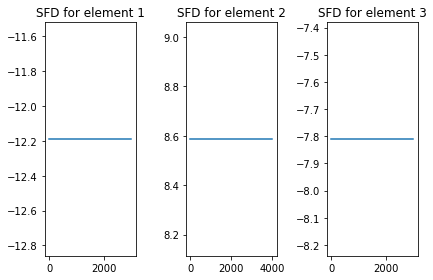

In [33]:

plt.subplot(1,3,1)
plt.plot([0,H],[f_1[1],f_1[1]])
plt.title('SFD for element 1')

plt.subplot(1,3,2)
plt.plot([0,B],[f_2[1],f_2[1]])
plt.title('SFD for element 2')

plt.subplot(1,3,3)
plt.plot([0,H],[f_3[1],f_3[1]])
plt.title('SFD for element 3')

plt.tight_layout()
plt.show()

# BMD (All BMDs are drawn on the outside of elements)

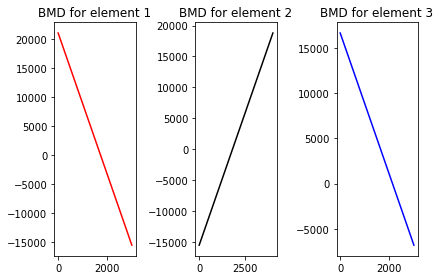

In [36]:
x1_plot=np.linspace(0,H,20)
x2_plot=np.linspace(0,B,20)
x3_plot=np.linspace(0,H,20)

M1_plot=-f_1[2]+f_1[1]*x1_plot
M2_plot=-f_2[2]+f_2[1]*x2_plot
M3_plot=-f_3[2]+f_3[1]*x3_plot

plt.subplot(1,3,1)
plt.plot(x1_plot,M1_plot,'r-')
plt.title('BMD for element 1')

plt.subplot(1,3,2)
plt.plot(x2_plot,M2_plot,'k-')
plt.title('BMD for element 2')

plt.subplot(1,3,3)
plt.plot(x3_plot,M3_plot,'b-')
plt.title('BMD for element 3')

plt.tight_layout()
plt.show()